<a href="https://colab.research.google.com/github/AnthonyM99/Seminario-Profesional/blob/master/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
import os
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

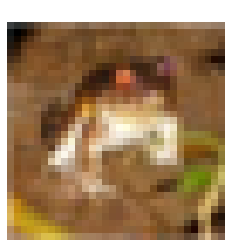

In [39]:
class_names = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0][0]])
plt.axis('off')
plt.show()

In [0]:
def plot_filters(layer):
    filters = layer.shape[3]

    columns = 8
    #rows = ((filters-1) // columns) + 1
    plt.figure(figsize=(10,10))    
    for i in range(filters):
      plt.subplot(columns, columns, i+1)
      plt.title('Filter ' + str(i), color='black')
      plt.axis('off')
      plt.imshow(layer[0,:,:,i], interpolation="nearest", cmap="gray")

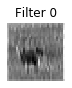

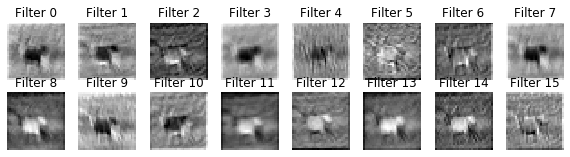

In [45]:
batch_size = 125
IMAGE_SIZE = (32, 32)

img = tf.cast(train_images[3], tf.float32)

conv = Conv2D(1, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

conv = Conv2D(16, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

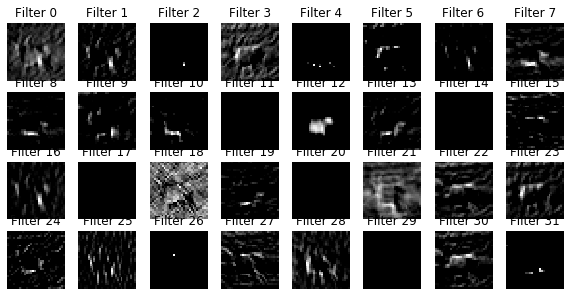

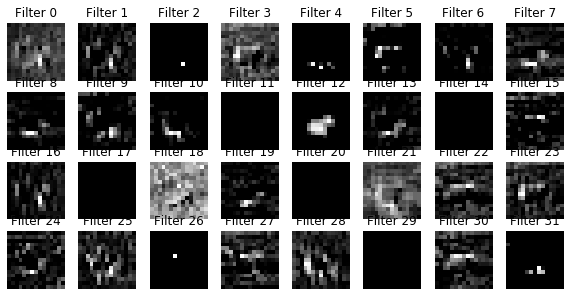

In [46]:
def plot_model_filters(layers, img):
  input = tf.expand_dims(img, 0)
  for filter_layer in layers:
    output = filter_layer(input)    
    input = output
    print(filter_layer)
    plot_filters(output.numpy())
  return

plot_model_filters(model.layers[:2], img)

In [40]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)              

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.4302 - accuracy: 0.4806 - val_loss: 1.2528 - val_accuracy: 0.5459
Epoch 2/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.1236 - accuracy: 0.6028 - val_loss: 1.0464 - val_accuracy: 0.6304
Epoch 3/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.9825 - accuracy: 0.6553 - val_loss: 0.9898 - val_accuracy: 0.6528
Epoch 4/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.8914 - accuracy: 0.6872 - val_loss: 0.9616 - val_accuracy: 0.6696
Epoch 5/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.8221 - accuracy: 0.7137 - val_loss: 0.9006 - val_accuracy: 0.6934
Epoch 6/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.7644 - accuracy: 0.7335 - val_loss: 0.8538 - val_accuracy: 0.7073
Epoch 7/10
50000/50000 [==============================] 

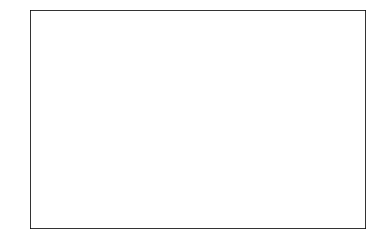

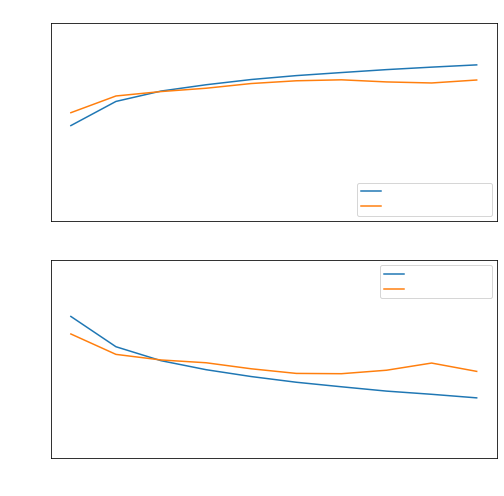

In [47]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

plot_accuracy_and_loss(history)